# Importing data, scaling and normalisation

This notebook is intended as an introduction to some of the basic functionality of Jupyter Notebooks used throughout this set of tutorials. First, we demonstrate how to import external packages, read the raw study data and configure the plotting interface.

We also demonstrate how to perform different types of scaling to the data matrix and visualise their impact on the raw data matrix and interpretation using the [AddNeuroMed](https://nyaspubs.onlinelibrary.wiley.com/doi/10.1111/j.1749-6632.2009.05064.x) dataset of Alzheimer's disease.

<br>

*Credits: This tutorial was originally created by Gonçalo Correia and was adapted by Lukas Kopecky and Frederico Soares in November 2023.*

## Preliminary Steps

### Installing Packages

First we need to install required packages and clone the files from the [GitHub Rpository](https://github.com/kopeckylukas/IPTC-chemometrics-tutorials-LCMS.git) using this we will use some BASH scripting. You can skip this step if you are running this tutorial locally on your system; we recommend you to use Anaconda to install the required packages instead and then clone the files from GitHub repository locally.

In [ ]:
!pip install -q ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.9 MB/s eta 0:00:00


In [2]:
!pip install kneed

In [3]:
!git clone https://github.com/kopeckylukas/IPTC-chemometrics-tutorials-LCMS.git
%cd IPTC-chemometrics-tutorials-LCMS

Cloning into 'IPTC-chemometrics-tutorials-LCMS'...
remote: Enumerating objects: 422, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 422 (delta 82), reused 76 (delta 75), pack-reused 336 (from 3)
Receiving objects: 100% (422/422), 106.78 MiB | 34.99 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/content/IPTC-chemometrics-tutorials-LCMS


### Package/code import and environment set up

The following cell imports the various necessary python packages. This cell is run at the beginning of each notebook.

In [ ]:
# NOTE: running this cell will result in an error and dependencies conflict.
# Move to next cell if the last line of the error message is "Successfully installed numpy-1.26.4 scipy-1.11.3"
# otherwise restart the runtime and RE-RUN the cell with pip install commented out

!pip install scipy==1.11.3 numpy==1.26.4

import scipy
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.11.3 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.3 which is incompatible.
t

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt


The PCA and PLS/PLS-DA/OrthogonalPLS codes provided in these tutorial notebooks are bundled as a python module (package) named **pyChemometrics**. As an example, the next cell imports the *pyChemometrics* scaler and PCA objects. The syntax and functions of these objects will be explained throughout the tutorials.

In [ ]:
# NOTE: It is likely that running this line will result in an error. If this occur, re-run this cell again.

# Example import
from pyChemometrics.ChemometricsPCA import ChemometricsPCA
from pyChemometrics.ChemometricsScaler import ChemometricsScaler

# Other available objects
# 1) ChemometricsPLS
# 2) ChemometricsOrthogonalPLS
# 3) ChemometricsPLSDA
# 4) ChemometricsOrthogonalPLSDA

The next cell sets up the figure display mode. The *notebook* mode allows interactive plotting. Another option is to select *inline*, to obtain static plots in a notebook cell.

In [ ]:
# Set the plot backend to support interactive plotting
# %matplotlib notebook

## Import data and plot

We will now import the LC-MS data with the metadata (Y variables) and feature annotation for LC-MS.

Then we split the data into two parts:

**rpos_x_matrix** - LC-MS data matrix

**gender_y** - Metadata that will act as the response variable for the PLS-DA model (sex/gender in this instance)

Then we extract the feature annotations:

**retention_times**, **mz_values** - annotation for the features of the rpos_x_matrix data

<br>

*NB - The dataset used in this tutorial has reduced features to speed up the model fitting proces. Full data available from [https://zenodo.org/doi/10.5281/zenodo.4053166](https://zenodo.org/doi/10.5281/zenodo.4053166). We recommend you to try to run the tutorial with the full dataset in your own time, or you can even try to run it using your own data.*


In [ ]:
# Load the dataset
dementia_rpos_dataset = pd.read_csv("./data/Dementia U RPOS_combinedData.csv",delimiter=',')

# Inspect the dataset
dementia_rpos_dataset.head(10)

,Sample ID,Subject ID,SampleType,Age,Gender,50.3_72.0806m/z,215.75_77.0383m/z,47.38_80.0493m/z,133.09_81.0331m/z,45.8_81.0445m/z,...,221.5_1071.3596m/z,205.8_1073.9622m/z,205.79_1074.4635m/z,205.8_1074.9644m/z,89.98_1083.0771m/z,89.91_1089.0929m/z,333.45_1127.4218m/z,187.72_1153.8814m/z,283.65_1167.5044m/z,74.63_1175.3683m/z
0,LND.0063_U,LND.0063,Study Sample,82.0,Female,4279.391329,132812.07700,4506.074689,2720.562045,2868.745303,...,4085.265210,6732.657513,6347.939155,3902.831649,5798.323898,7964.330802,4796.908684,2165.982590,3846.940012,7223.434421
1,DCR00076_U,DCR00076,Study Sample,74.0,Male,3945.457625,138417.13090,1309.942294,1249.494055,3494.259023,...,11689.675430,5598.134302,5787.515322,3195.600251,5593.213256,7127.606038,217.280582,5715.565758,2685.038347,14887.697220
2,KPOA0004_U,KPOA0004,Study Sample,67.0,Female,9362.587006,142398.08450,18505.468440,9877.856453,1190.134653,...,8113.116987,11536.424940,14606.669620,8306.750990,9581.929077,12591.520030,10220.392560,7290.037248,15899.085500,7111.481525
3,DCR00265_U,DCR00265,Study Sample,88.0,Female,4728.639671,87022.61809,5095.729830,847.960283,1266.689112,...,554.468858,5788.639874,5788.965883,3821.990772,997.141966,2950.769791,2174.997429,925.601299,1696.691802,3536.644549
4,KPOA0049_U,KPOA0049,Study Sample,85.0,Male,8448.154954,185732.46750,4036.783755,14654.424660,6360.068832,...,25373.816680,23308.826020,24329.813490,14261.064530,10243.987800,9933.765569,119.693782,6935.052278,9301.116601,15081.717310
5,KPOA0011_U,KPOA0011,Study Sample,82.0,Male,8333.437153,158113.97740,2927.022002,8535.293454,3462.878918,...,19016.873060,15987.007250,16609.021980,9836.509310,6799.758780,11672.230070,3920.531258,7231.692635,11555.081630,25438.725010
6,PRGM0042_U,PRGM0042,Study Sample,77.0,Male,3551.019694,82850.57009,2528.345643,206.912705,805.523511,...,98.747815,2239.134433,2630.167785,1014.218767,377.620351,1177.499780,0.000000,1054.639825,598.077077,1613.640069
7,LDZM0019_U,LDZM0019,Study Sample,69.0,Female,4156.050266,112126.17020,2659.404458,10544.900410,2386.309049,...,3023.892963,3521.890101,4089.724227,3037.316942,9358.043631,7476.169739,0.000000,1974.148433,1924.622499,5064.162185
8,Study Pool Sample,NaN,Study Pool,NaN,NaN,4841.697700,134620.75260,5101.091535,6291.826442,3722.901385,...,16108.271080,11961.562210,12934.237030,7598.929570,9412.778118,10638.920610,10210.410720,5344.809529,7409.380886,16539.872020
9,KPOA0034_U,KPOA0034,Study Sample,79.0,Male,9405.683884,141447.98940,4041.763242,3193.125809,1738.023817,...,8131.658752,16325.538920,16880.153110,9365.095716,2951.997812,5534.942925,422.108513,2247.097761,7448.401687,10513.124410


In [ ]:
# Delete samples where outcome variable is unknown (In this example QC samples)
dementia_rpos_dataset = dementia_rpos_dataset[~dementia_rpos_dataset['Gender'].isnull()]

rpos_x_matrix = dementia_rpos_dataset.iloc[:, 5::].values

X = dementia_rpos_dataset.iloc[:, 5:305].values  #Subset for demonstration (300 variables)

variable_names = dementia_rpos_dataset.columns[5::]

# Use pandas Categorical type
Y = pd.Categorical(dementia_rpos_dataset['Gender']).codes
Y2 = dementia_rpos_dataset['Age'].values

# Extract the retention times and m/z to use in 2D plots of the dataset
retention_times = np.array([x.split('_')[0] for x in variable_names], dtype='float')/60
mz_values = np.array([x.split('_')[1][0:-3] for x in variable_names], dtype='float')

**Note**: To apply the analyses exemplified in this notebook to any other dataset, just modify the cell above to import the data matrices and vectors X and Y from any other source file.

The expected data types and formatting for **X** and **Y** are:

   **X**: Any data matrix with n rows (observations/samples) and p columns (variables/features). The matrix should be provided as a [numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object, with 2 dimensions, and with shape = (n, p). We recommend using the *numpy* function [numpy.genfromtxt](https://numpy.org/devdocs/reference/generated/numpy.genfromtxt.html) or the *pandas* [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to read the data from a text file. When using the *pandas.read_csv* function, extract the data matrix as a *numpy.ndarray* from the pandas.DataFrame object using the `.values` attribute.
```
X_DataFrame = pds.read_csv("./data/X_spectra.csv")
X = X_DataFrame.values
```
   
   **Y** vectors: Each **Y** vector should be a 1-dimensional [numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object, with a number and ordering of elements matching the rows in **X**. For continuous variables, any regular *numpy.ndarray* with a data type of `int` (integers only) or `float` can be used.
   ```
   Y_continuous = numpy.ndarray([23.4, 24, 0.3, -1.23], dtype='float')
   ```
To encode binary class labels, a *numpy.ndarray* of dtype `int`, with 0 and 1 as labels (e.g., 0 = Control, 1 = Case) must be used. The way in which classes are encoded will affect the model interpretation: the class labeled as 1 is used as the "positive/case" class by the *pyChemometrics* objects.
   
   In the example above, we used the *pandas* [Categorical](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) datatype to handle the conversion of the original numerical values (1, 2) to the required (0, 1) labels. After converting a column to a `Categorical` datatype, the `.codes` attribute returns a vector with the same length of the original Y, but where each value is replaced by their integer (`int`) code. The correspondence between code and category can be inspected with the `categories` attribute. The order of the labels in `.codes` is the same as the order of the `categories` attribute (i.e. 0 is the first element in `categories`, 1 the second and so on).
   ```
   Y1 = pds.Categorical(Y.iloc[:, 1])
   Y1.codes # The numerical label
   Y1.categories # Original text or numerical description of the category
   ```
   [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) is another helpful function to perform dummy (0-1) encoding of variables.

### Plot the raw data

The plot in the next cell displays a series of histograms of distributions of selected variables. The X axis corresponds to the peak relative abundances amd the Y axis their frequencies.  

<Axes: ylabel='Frequency'>

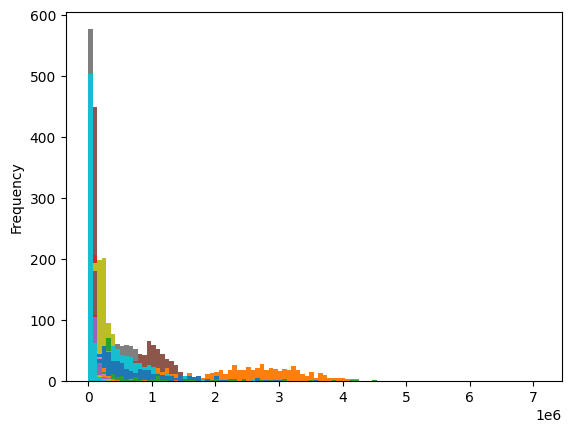

In [ ]:
pd.DataFrame(X).plot.hist(bins=100, legend=False)

# Scaling

The choice of scaling is an important parameter choice when modelling the data with PCA and PLS regression algorithms. The scaling parameter impacts on the predictive performance of the model, the trends recovered from the data and model interpretation (i.e., loading vectors).

Scaling consists in dividing each variable (column of the data matrix) by a constant value. Variables with a higher intensity tend to have a higher variance. Since PCA and PLS maximize the recovery of variance and covariance, on non-scaled datasets the model will be biased towards features with higher signal intensity. Biologically, it is more reasonable to ensure all variables should be be given equal weight independent of their signal intensity. Scaling the data matrix can remove this bias and enhance recovery of important trends from lower intensity signals.

For more information about data scaling and transformation in metabolomics, we recommend [Berg et al. 2006](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1534033/)

The following 3 types of scaling choices are commonly used with multivariate PCA and PLS analyses:

Mean centring (MC) = $\frac{X - \mu}{\sigma^{0}}$, *scale_power* = 0. Mean centre all variables and apply no scaling.

Pareto scaling = $\frac{X - \mu}{\sigma^{1/2}}$, *scale_power* = 1/2. Mean centre all variables and divide each variable by the square root of its standard deviation ($\sigma$)

Unit variance (UV) scaling = $\frac{X - \mu}{\sigma^{1}}$, *scale_power* = 1. Mean center all variables and scale each variable by its standard deviation.


In the *pyChemometrics.ChemometricsScaler* objects we use the *scale_power* argument to represent the exponent of standard deviation used in scaling.

These three kinds of scaling are demonstrated below, followed by two other data transformation options, the logarithm and the square root transformation.


### 1) Mean-centring only (no scaling)

Removal of the column-wise mean from the data matrix (each variable is recentered around its own mean). Mean centring is usually suggested (although not a hard-requirement, the data).

We will apply the different scaling methods using the *pyChemometrics.ChemometricsScaler* object. We start by initialising a *ChemometricsScaler* object. The *fit* method extracts the scaling parameters (mean and standard deviation vectors) from a data matrix, while the *transform* method takes a data matrix as input and applies to it the scaling using the parameters estimated when the *fit* method was last used.

In [ ]:
mc_scaler = ChemometricsScaler(scale_power=0)
mc_scaler.fit(X)
mc_X = mc_scaler.transform(X)


In the next cell we plot the mean centred data matrix. The main features of the spectrum are still relatively easy to pinpoint (which will aid interpretation of multivariate parameters), but the wide range of values still means that higher intensity variables will dominate the analysis. This *penalises* the detection of trends in low intensity signals, which is not, but also ensures that spurious variation in noise peaks.

<Axes: ylabel='Frequency'>

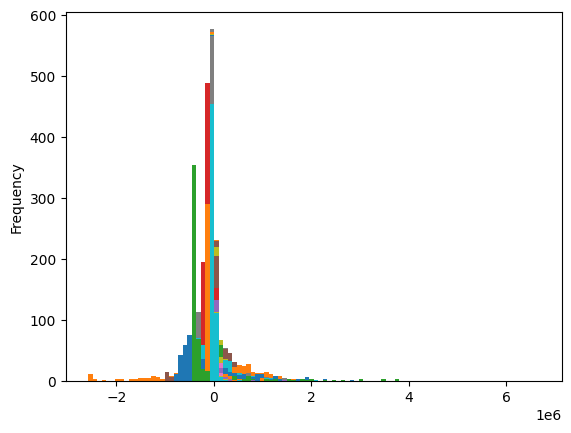

In [ ]:
pd.DataFrame(mc_X).plot.hist(bins=100, legend=False)

### 2) Unit-variance (UV) scaling: Mean-centring followed by division of each variable (column) by its own standard deviation

Now the latent variables detected will not be biased towards variation in the high intensity variables, which biologically is a more reasonable criteria. Low intensity noise values are more likely to be picked up, including baseline artefacts, and the magnitude of most variables is now equalised, making it harder to recognise the spectral profile.

In the next example we use the *fit_transform* method, which learns the scaling parameters and returns a scaled data matrix in one go.

In [ ]:
uv_scaler = ChemometricsScaler(scale_power=1)
uv_X = uv_scaler.fit_transform(X)


<Axes: ylabel='Frequency'>

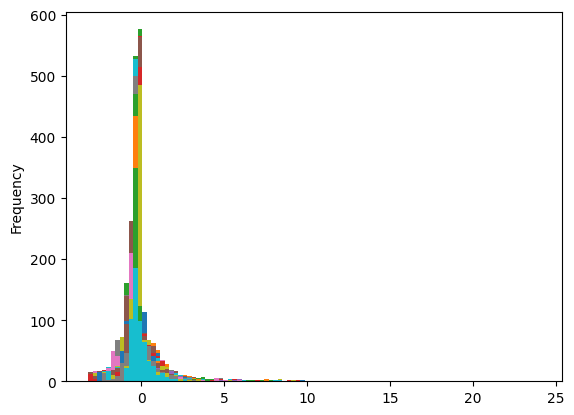

In [ ]:
# Univariate and mean-centred
pd.DataFrame(uv_X).plot.hist(bins=100, legend=False)

### 3) Pareto scaling: Mean-centring followed by division of each variable (column) by the square root of its own standard deviation

Pareto scaling provides a balance between the mean centering (no scaling) and UV scaling.

In [ ]:
par_scaler = ChemometricsScaler(scale_power=1/2)
pa_X = par_scaler.fit_transform(X)

<Axes: ylabel='Frequency'>

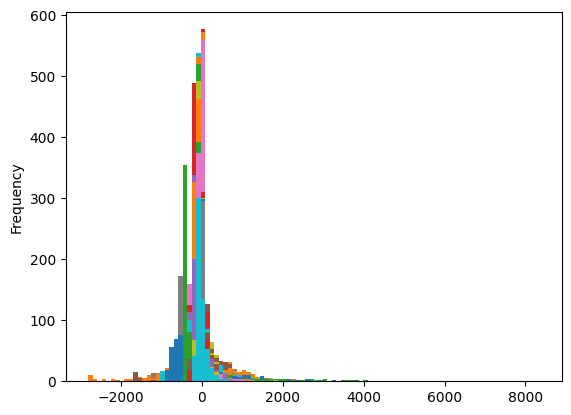

In [ ]:
#std_dev_sq_root = np.sqrt(mc_X.std(axis=0))
#pa_X = mc_X / std_dev_sq_root

pd.DataFrame(pa_X).plot.hist(bins=100, legend=False)

### 4) Logarithmic and square root transformation

Another option is to apply non-linear transformations to the data matrix, such as the logarithmic transform and the square-root transformation.

<Axes: ylabel='Frequency'>

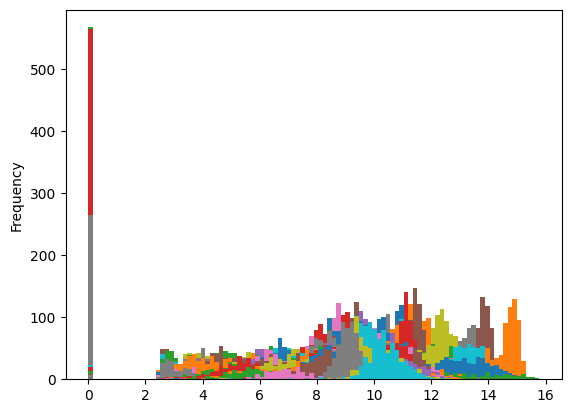

In [ ]:
# Log1p scaling
log1p_x = np.log1p(X)

pd.DataFrame(log1p_x).plot.hist(bins=100, legend=False)



Log-transformation is a non-linear transformation, which has the advantage of removing the effect of heteroskedasticity between and within variables, when the coefficient of variation of the methods is constant (variance increasing with the mean). The scaling effect it has on variables is somewhat similar to Pareto scaling. They are also recommended for univariate analysis.
These transformations functions are not defined for 0 values. To perform logarithmic transform  we first add an offset to ensure all data points are non-negative and non-zero. Here it is calculated by adding the minimum value in the dataset plus 1. Any offset or other transformation should be carefully recorded.

Logarithmic and square-root transformations are not implemented in the *pyChemometrics.ChemometricsScaler* object, but can be applied by transforming the data as shown below. After applying these transformations, the data should still be mean centred before PCA and PLS modeling.

<Axes: ylabel='Frequency'>

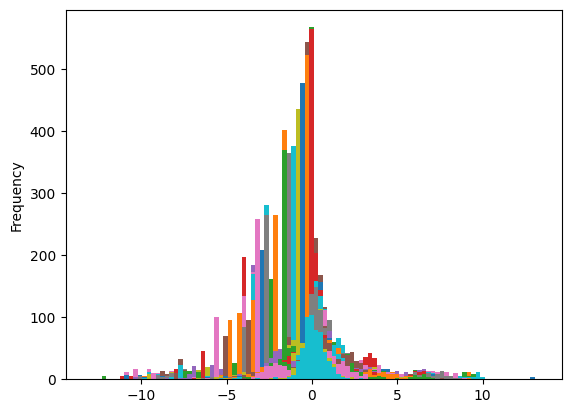

In [ ]:
# Log scaling

# Offset is required to ensure all datapoints are non-negative and non-zero.
# Here it is being calculated by simply adding 1
#to the minimum value in the dataset (to account for negative values in the noise region as well as 0).

offset = np.min(X) + 1
log_X = np.log(X + offset)
mean_logvec = np.mean(log_X, axis=0)
mclogX = (log_X - mean_logvec)

pd.DataFrame(mclogX).plot.hist(bins=100, legend=False)


# The code above is equivalent to:
# mc_scaler = ChemometricsScaler(scale_power=0)
# mclogX = mc_scaler.fit_transform(np.log1p(X))

<Axes: ylabel='Frequency'>

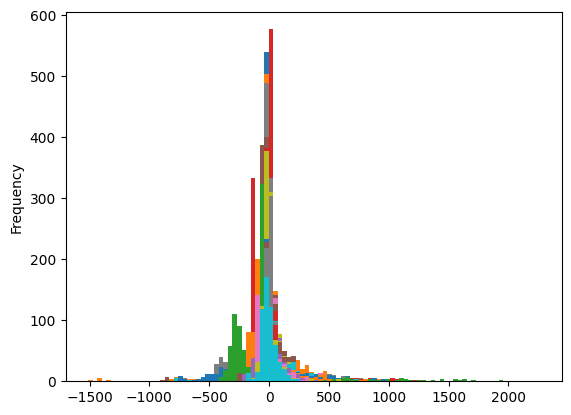

In [ ]:

# Square root transformation

# Offset is required to ensure all datapoints are non-negative and non-zero.
# Here it is being calculated by simply adding 1
#to the minimum value in the dataset (to account for negative values in the noise region as well as 0).

offset = np.min(X) + 1
sqrt_X = np.sqrt(X + offset)
mean_sqrvec = np.mean(sqrt_X, axis=0)
mcsqrt_X = (sqrt_X - mean_sqrvec)

pd.DataFrame(mcsqrt_X).plot.hist(bins=100, legend=False)

